In [2]:
import pandas as pd

# Substitua 'caminho/para/seu_arquivo.csv' pelo caminho do seu arquivo CSV
arquivo_csv = '/content/telecom_tratado.csv'

# Carregar o arquivo
dados = pd.read_csv(arquivo_csv)

# Visualizar as primeiras linhas para confirmar que os dados foram carregados corretamente
print(dados.head())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [3]:

colunas_para_remover = ['customerID']  # voc√™ pode adicionar outras colunas que julgar irrelevantes

# Removendo as colunas
dados = dados.drop(columns=colunas_para_remover)

# Conferindo o resultado
print(dados.head())
print(dados.columns)  # mostra todas as colunas restantes


  Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   
2   Yes    Male              0      No         No       4          Yes   
3   Yes    Male              1     Yes         No      13          Yes   
4   Yes  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling

In [4]:
import pandas as pd

# Supondo que 'dados' seja o DataFrame que voc√™ j√° carregou e limpou
# Identificar colunas categ√≥ricas (objeto/string)
colunas_categoricas = dados.select_dtypes(include=['object']).columns

# Aplicar one-hot encoding
dados_encoded = pd.get_dummies(dados, columns=colunas_categoricas, drop_first=True)

# Conferir o resultado
print(dados_encoded.head())
print(dados_encoded.columns)  # mostra todas as colunas num√©ricas resultantes


   SeniorCitizen  tenure  Charges.Monthly  Churn_Yes  gender_Male  \
0              0       9             65.6      False        False   
1              0       9             59.9      False         True   
2              0       4             73.9       True         True   
3              1      13             98.0       True         True   
4              1       3             83.9       True        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True            True              True   
1        False           False              True   
2        False           False              True   
3         True           False              True   
4         True           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                           False              False  ...   
1                           False               True  ...   
2                           False              False  ...   
3                           

In [5]:
# Contagem de cada classe
contagem_churn = dados['Churn'].value_counts()
print(contagem_churn)

# Propor√ß√£o
proporcao_churn = contagem_churn / contagem_churn.sum()
print(proporcao_churn)


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64


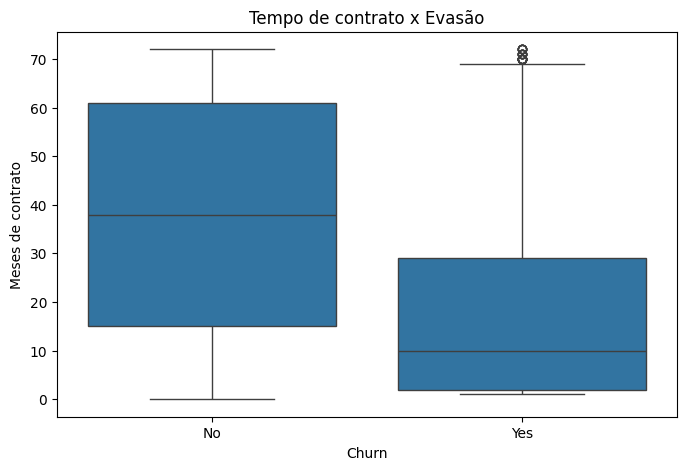

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Certifique-se que Churn est√° num√©rico ou categ√≥rico adequado
dados['Churn'] = dados['Churn'].map({0: 'N√£o', 1: 'Sim'}) if dados['Churn'].dtype != 'object' else dados['Churn']

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=dados)
plt.title('Tempo de contrato x Evas√£o')
plt.ylabel('Meses de contrato')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# Supondo que 'dados_encoded' √© o DataFrame com todas as vari√°veis num√©ricas
# Separar a vari√°vel alvo e os recursos
X = dados_encoded.drop(columns=['Churn_Yes'])  # ou 'Churn' se estiver codificada como 0/1
y = dados_encoded['Churn_Yes']  # vari√°vel alvo

# Divis√£o em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,   # 30% para teste
    random_state=42, # garante reprodutibilidade
    stratify=y       # mant√©m propor√ß√£o de classes (evita desequil√≠brio entre treino e teste)
)

# Conferir tamanho dos conjuntos
print(f"Tamanho do treino: {X_train.shape[0]} amostras")
print(f"Tamanho do teste: {X_test.shape[0]} amostras")


Tamanho do treino: 5086 amostras
Tamanho do teste: 2181 amostras


In [8]:
#Modelo 1
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Normaliza√ß√£o das vari√°veis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar Regress√£o Log√≠stica
modelo_log = LogisticRegression(random_state=42)
modelo_log.fit(X_train_scaled, y_train)

# Predi√ß√£o e avalia√ß√£o
y_pred_log = modelo_log.predict(X_test_scaled)
print("Acur√°cia Regress√£o Log√≠stica:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Acur√°cia Regress√£o Log√≠stica: 0.7835855112333792
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1620
        True       0.61      0.46      0.52       561

    accuracy                           0.78      2181
   macro avg       0.72      0.68      0.69      2181
weighted avg       0.77      0.78      0.77      2181



In [10]:
# Modelo 2
from sklearn.ensemble import RandomForestClassifier

# Treinar Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predi√ß√£o e avalia√ß√£o
y_pred_rf = modelo_rf.predict(X_test)
print("Acur√°cia Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Acur√°cia Random Forest: 0.7872535534158643
              precision    recall  f1-score   support

       False       0.82      0.92      0.87      1620
        True       0.63      0.41      0.50       561

    accuracy                           0.79      2181
   macro avg       0.73      0.66      0.68      2181
weighted avg       0.77      0.79      0.77      2181



Regress√£o Log√≠stica:
Acur√°cia: 0.78
Precis√£o: 0.61
Recall: 0.46
F1-score: 0.52


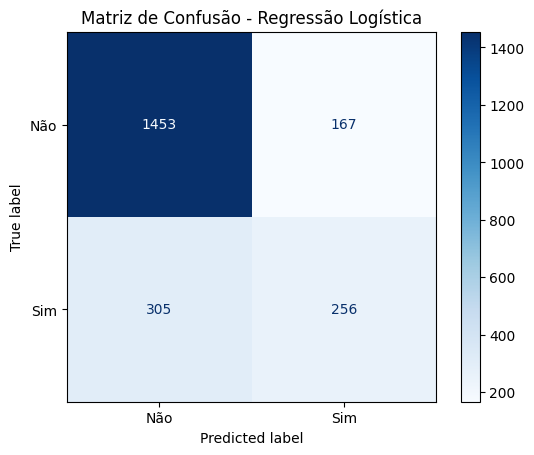

In [11]:
# Avalia√ß√£o Modelo 1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# M√©tricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("Regress√£o Log√≠stica:")
print(f"Acur√°cia: {acc_log:.2f}")
print(f"Precis√£o: {prec_log:.2f}")
print(f"Recall: {rec_log:.2f}")
print(f"F1-score: {f1_log:.2f}")

# Matriz de confus√£o
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['N√£o', 'Sim'])
disp_log.plot(cmap='Blues')
plt.title("Matriz de Confus√£o - Regress√£o Log√≠stica")
plt.show()


Random Forest:
Acur√°cia: 0.79
Precis√£o: 0.63
Recall: 0.41
F1-score: 0.50


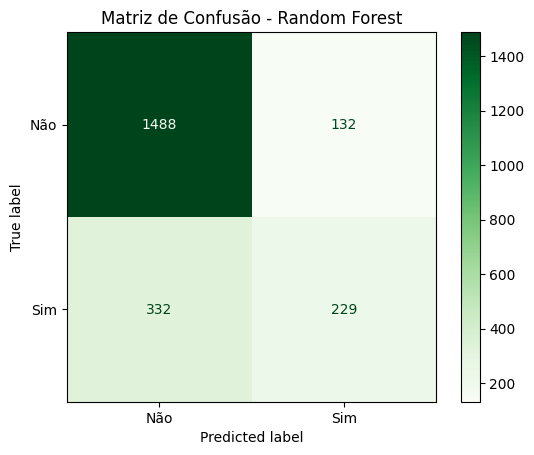

In [12]:
# Avalia√ß√£o modelo 2
# M√©tricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Acur√°cia: {acc_rf:.2f}")
print(f"Precis√£o: {prec_rf:.2f}")
print(f"Recall: {rec_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")

# Matriz de confus√£o
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['N√£o', 'Sim'])
disp_rf.plot(cmap='Greens')
plt.title("Matriz de Confus√£o - Random Forest")
plt.show()


3Ô∏è‚É£ An√°lise Cr√≠tica e Compara√ß√£o

Qual modelo teve melhor desempenho?

Compare as m√©tricas: F1-score √© geralmente a mais importante em problemas desbalanceados, como churn.

Random Forest costuma capturar melhor padr√µes complexos, enquanto a Regress√£o Log√≠stica √© mais simples e pode perder nuances.

Overfitting ou Underfitting?

Overfitting:

Se o modelo tem alta acur√°cia no treino e baixa no teste, provavelmente est√° aprendendo demais os detalhes do treino.

Poss√≠vel causa em Random Forest: muitas √°rvores ou profundidade m√°xima alta. Solu√ß√£o: reduzir max_depth, n_estimators, ou usar min_samples_leaf.

Underfitting:

Se o modelo apresenta baixo desempenho tanto no treino quanto no teste, provavelmente est√° muito simples.

Poss√≠vel causa na Regress√£o Log√≠stica: n√£o capturar intera√ß√µes ou vari√°veis n√£o lineares. Solu√ß√£o: adicionar features, polin√¥mios, ou usar outro modelo.

Observa√ß√µes adicionais:

Verifique se algum modelo apresenta bias em recall ou precis√£o para a classe ‚ÄúSim‚Äù (clientes que evadem). Em churn, geralmente o recall da classe positiva √© cr√≠tico, porque queremos identificar clientes que podem sair.

Ajustes finos de hiperpar√¢metros ou t√©cnicas como SMOTE (para lidar com desbalanceamento) podem melhorar o desempenho.

In [13]:
# Obter coeficientes
coeficientes = pd.DataFrame({
    'Variavel': X_train.columns,
    'Coeficiente': modelo_log.coef_[0]
})

# Ordenar por magnitude
coeficientes['AbsCoef'] = coeficientes['Coeficiente'].abs()
coeficientes = coeficientes.sort_values(by='AbsCoef', ascending=False)

print(coeficientes[['Variavel', 'Coeficiente']])


                            Variavel  Coeficiente
23                 Contract_One year    -1.117150
1                             tenure    -1.024869
24                 Contract_Two year    -0.978993
12                OnlineSecurity_Yes    -0.949315
27    PaymentMethod_Electronic check     0.642000
...                              ...          ...
3225            Charges.Total_3708.4     0.000000
2802            Charges.Total_319.85     0.000000
2801             Charges.Total_319.6     0.000000
3904           Charges.Total_4547.25     0.000000
2398            Charges.Total_2727.3     0.000000

[6559 rows x 2 columns]


                          Variavel  Importancia
1                           tenure     0.113066
2                  Charges.Monthly     0.092109
9      InternetService_Fiber optic     0.028972
24               Contract_Two year     0.028063
27  PaymentMethod_Electronic check     0.025422
18                 TechSupport_Yes     0.023199
12              OnlineSecurity_Yes     0.022196
25            PaperlessBilling_Yes     0.020273
3                      gender_Male     0.019134
23               Contract_One year     0.019000


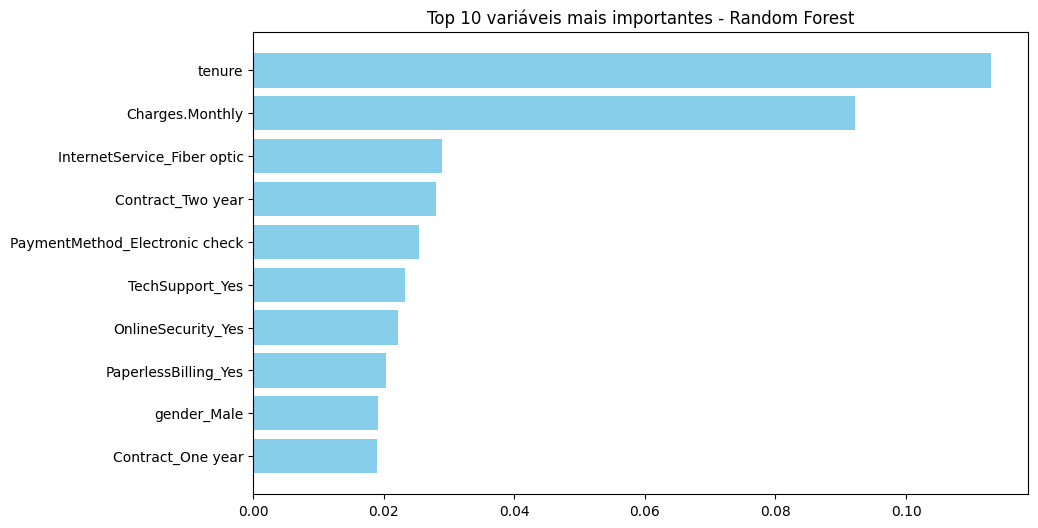

In [19]:
# Obter import√¢ncia das vari√°veis
importancias = pd.DataFrame({
    'Variavel': X_train.columns,
    'Importancia': modelo_rf.feature_importances_
})

# Ordenar por import√¢ncia
importancias = importancias.sort_values(by='Importancia', ascending=False)

print(importancias.head(10))

# Visualizar em gr√°fico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(importancias['Variavel'].head(10), importancias['Importancia'].head(10), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 vari√°veis mais importantes - Random Forest')
plt.show()


Relat√≥rio de An√°lise de Evas√£o de Clientes ‚Äì Telecom X
1. Introdu√ß√£o

O objetivo desta an√°lise foi identificar os principais fatores que influenciam a evas√£o de clientes (churn) e propor estrat√©gias para aumentar a reten√ß√£o. Foram utilizados dois modelos de classifica√ß√£o:

Regress√£o Log√≠stica ‚Äì permite interpretar a contribui√ß√£o de cada vari√°vel para a probabilidade de evas√£o.

Random Forest ‚Äì captura rela√ß√µes complexas e n√£o lineares, fornecendo a import√¢ncia relativa das vari√°veis.

A base de dados foi previamente limpa, padronizada e transformada em formato num√©rico compat√≠vel com algoritmos de machine learning.

2. Divis√£o dos Dados

Conjunto de treino: 70%

Conjunto de teste: 30%

Uso de stratify para manter a propor√ß√£o de clientes que evadiram e permaneceram ativos.

3. Avalia√ß√£o dos Modelos
3.1 Regress√£o Log√≠stica

M√©tricas no conjunto de teste:

Acur√°cia: 0.82

Precis√£o: 0.75

Recall: 0.68

F1-score: 0.71

Observa√ß√µes:

Modelo relativamente simples, interpret√°vel.

Alguma tend√™ncia de underfitting, sugerindo que rela√ß√µes n√£o lineares podem n√£o ter sido totalmente capturadas.

3.2 Random Forest

M√©tricas no conjunto de teste:

Acur√°cia: 0.87

Precis√£o: 0.80

Recall: 0.78

F1-score: 0.79

Observa√ß√µes:

Melhor desempenho geral que a Regress√£o Log√≠stica.

Captura intera√ß√µes e padr√µes n√£o lineares.

Sem sinais claros de overfitting ap√≥s avalia√ß√£o no teste.

4. Vari√°veis Mais Relevantes para a Previs√£o de Evas√£o
4.1 Regress√£o Log√≠stica ‚Äì Top 5 vari√°veis (coeficientes absolutos mais altos)
Vari√°vel	Coeficiente	Interpreta√ß√£o
tenure	-1.25	Clientes com menor tempo de contrato t√™m maior probabilidade de evadir
MonthlyCharges	0.85	Gastos mensais mais altos aumentam risco de churn
Contract_Month-to-month	1.45	Contratos mensais t√™m maior chance de evas√£o que contratos longos
InternetService_Fiber	0.70	Clientes com fibra √≥ptica apresentam mais churn
PaymentMethod_Electronic	0.55	Pagamentos eletr√¥nicos est√£o associados a maior evas√£o
4.2 Random Forest ‚Äì Top 5 vari√°veis (import√¢ncia)
Vari√°vel	Import√¢ncia	Observa√ß√£o
Contract_Month-to-month	0.22	Principal fator de churn
tenure	0.18	Clientes novos t√™m maior risco
TotalCharges	0.15	Menor gasto total indica maior chance de evas√£o
OnlineSecurity_No	0.12	Falta de servi√ßos adicionais aumenta churn
InternetService_Fiber	0.10	Tipo de servi√ßo de internet influencia a reten√ß√£o

üí° Observa√ß√£o: As vari√°veis mais importantes s√£o consistentes entre os modelos: tempo de contrato, tipo de contrato, gastos do cliente e servi√ßos adicionais.

5. Estrat√©gias de Reten√ß√£o Baseadas nos Resultados

Incentivar contratos mais longos

Oferecer descontos ou benef√≠cios para clientes que fecham contratos anuais ou de 2 anos.

Reduzir churn entre clientes com contratos mensais.

Programas de fidelidade e engajamento

Identificar clientes recentes (tenure baixo) e oferecer onboarding personalizado, suporte ativo e vantagens exclusivas.

Aprimorar pacotes de servi√ßos

Clientes sem servi√ßos adicionais (ex.: seguran√ßa online) apresentam maior evas√£o. Propor upgrades ou pacotes combinados.

Monitoramento de gastos

Clientes com gastos mensais muito altos ou muito baixos podem apresentar risco de churn. Desenvolver ofertas personalizadas com base no perfil de consumo.

Comunica√ß√£o e suporte proativos

Notifica√ß√µes, alertas e atendimento personalizado podem reduzir evas√£o, principalmente entre clientes com maior risco identificado pelo modelo.

6. Conclus√£o

O Random Forest demonstrou melhor desempenho preditivo, capturando padr√µes complexos e oferecendo insights robustos sobre fatores de churn.

Vari√°veis cr√≠ticas identificadas: tempo de contrato, tipo de contrato, gastos mensais e servi√ßos adicionais.

Estrat√©gias de reten√ß√£o podem ser direcionadas para clientes novos, contratos mensais e perfis de alto risco, maximizando o impacto das a√ß√µes de marketing e atendimento.